# **Topic: EMPLOYEE SALARY PREDICTION**

Using:
- Linear Regression
- SVR
- RFR

In [ ]:
import pandas as pd

#load the dataset
df=pd.read_csv('/content/employee_attrition_data.csv')

print(df)
print(df.head(10))
print(df.tail(10))
print(df.columns)
df.info

     Employee_ID  Age  Gender   Department      Job_Title  Years_at_Company  \
0              0   27    Male    Marketing        Manager                 9   
1              1   53  Female        Sales       Engineer                10   
2              2   59  Female    Marketing        Analyst                 8   
3              3   42  Female  Engineering        Manager                 1   
4              4   44  Female        Sales       Engineer                10   
..           ...  ...     ...          ...            ...               ...   
995          995   39  Female           HR  HR Specialist                 3   
996          996   50    Male  Engineering        Manager                 1   
997          997   52    Male  Engineering        Analyst                 3   
998          998   37  Female           HR  HR Specialist                 2   
999          999   59    Male        Sales  HR Specialist                 1   

     Satisfaction_Level  Average_Monthly_Hours  Pro

<bound method DataFrame.info of      Employee_ID  Age  Gender   Department      Job_Title  Years_at_Company  \
0              0   27    Male    Marketing        Manager                 9   
1              1   53  Female        Sales       Engineer                10   
2              2   59  Female    Marketing        Analyst                 8   
3              3   42  Female  Engineering        Manager                 1   
4              4   44  Female        Sales       Engineer                10   
..           ...  ...     ...          ...            ...               ...   
995          995   39  Female           HR  HR Specialist                 3   
996          996   50    Male  Engineering        Manager                 1   
997          997   52    Male  Engineering        Analyst                 3   
998          998   37  Female           HR  HR Specialist                 2   
999          999   59    Male        Sales  HR Specialist                 1   

     Satisfaction_Level  Average_Monthly_Hours  Promotion_Last_5Years  Salary  \
0              0.586251                    151                      0   60132   
1              0.261161                    221                      1   79947   
2              0.304382                    184                      0   46958   
3              0.480779                    242                      0   40662   
4              0.636244                    229                      1   74307   
..                  ...                    ...                    ...     ...   
995            0.377435                    239                      0   71403   
996            0.431152                    154                      0   30181   
997            0.647102                    206                      0   64143   
998            0.304813                    241                      0   74383   
999            0.940510                    159                      0   73220   

     Attrition  
0            0  
1            0  
2            1  
3            0  
4            0  
..         ...  
995          0  
996          1  
997          0  
998          1  
999          1  

[1000 rows x 11 columns]>

In [ ]:
df.isna().sum()

,0
Employee_ID,0
Age,0
Gender,0
Department,0
Job_Title,0
Years_at_Company,0
Satisfaction_Level,0
Average_Monthly_Hours,0
Promotion_Last_5Years,0
Salary,0


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
print(df.head())

   Employee_ID  Age  Gender   Department Job_Title  Years_at_Company  \
0            0   27    Male    Marketing   Manager                 9   
1            1   53  Female        Sales  Engineer                10   
2            2   59  Female    Marketing   Analyst                 8   
3            3   42  Female  Engineering   Manager                 1   
4            4   44  Female        Sales  Engineer                10   

   Satisfaction_Level  Average_Monthly_Hours  Promotion_Last_5Years  Salary  \
0            0.586251                    151                      0   60132   
1            0.261161                    221                      1   79947   
2            0.304382                    184                      0   46958   
3            0.480779                    242                      0   40662   
4            0.636244                    229                      1   74307   

   Attrition  
0          0  
1          0  
2          1  
3          0  
4          0  


In [ ]:
df.drop(columns='Employee_ID',inplace=True)

In [ ]:
df.head()

,Age,Gender,Department,Job_Title,Years_at_Company,Satisfaction_Level,Average_Monthly_Hours,Promotion_Last_5Years,Salary,Attrition
0,27,Male,Marketing,Manager,9,0.586251,151,0,60132,0
1,53,Female,Sales,Engineer,10,0.261161,221,1,79947,0
2,59,Female,Marketing,Analyst,8,0.304382,184,0,46958,1
3,42,Female,Engineering,Manager,1,0.480779,242,0,40662,0
4,44,Female,Sales,Engineer,10,0.636244,229,1,74307,0


In [ ]:
!pip install matplotlib

In [ ]:
import matplotlib.pyplot as plt

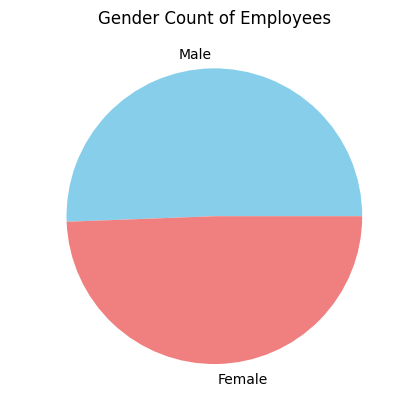

In [ ]:
df['Gender'].value_counts().plot(kind='pie', colors=['skyblue', 'lightcoral'])
plt.ylabel(" ")
plt.title("Gender Count of Employees")
plt.show()

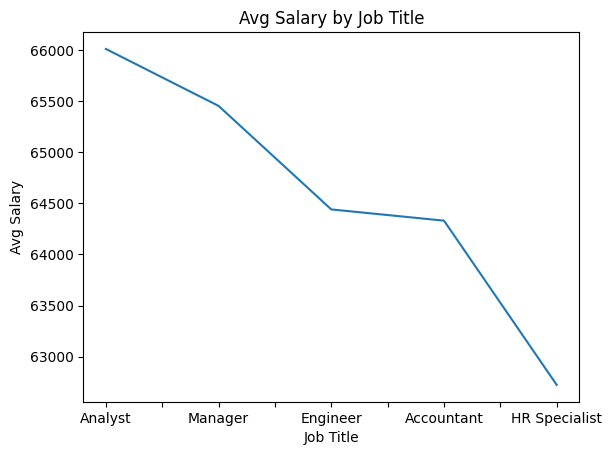

In [ ]:
df.groupby('Job_Title')['Salary'].mean().sort_values(ascending=False).plot(kind='line')
plt.title('Avg Salary by Job Title')
plt.xlabel('Job Title')
plt.ylabel('Avg Salary')
plt.show()

In [20]:
df.groupby(['Department','Promotion_Last_5Years'])['Salary'].mean().reset_index()

,Department,Promotion_Last_5Years,Salary
0,Engineering,0,65541.063636
1,Engineering,1,62424.127660
2,Finance,0,63390.145299
3,Finance,1,62041.269663
4,HR,0,63012.556701
5,HR,1,65882.861702
6,Marketing,0,65251.597826
7,Marketing,1,66018.632653
8,Sales,0,64295.846939
9,Sales,1,67838.756757


In [18]:
df.head()

,Age,Gender,Department,Job_Title,Years_at_Company,Satisfaction_Level,Average_Monthly_Hours,Promotion_Last_5Years,Salary,Attrition
0,27,Male,Marketing,Manager,9,0.586251,151,0,60132,0
1,53,Female,Sales,Engineer,10,0.261161,221,1,79947,0
2,59,Female,Marketing,Analyst,8,0.304382,184,0,46958,1
3,42,Female,Engineering,Manager,1,0.480779,242,0,40662,0
4,44,Female,Sales,Engineer,10,0.636244,229,1,74307,0


In [17]:
df.describe()

,Age,Years_at_Company,Satisfaction_Level,Average_Monthly_Hours,Promotion_Last_5Years,Salary,Attrition
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,42.205000,5.605000,0.505995,199.493000,0.486000,64624.980000,0.495000
std,10.016452,2.822223,0.289797,29.631908,0.500054,20262.984333,0.500225
min,25.000000,1.000000,0.001376,150.000000,0.000000,30099.000000,0.000000
25%,33.000000,3.000000,0.258866,173.000000,0.000000,47613.500000,0.000000
50%,43.000000,6.000000,0.505675,201.000000,0.000000,64525.000000,0.000000
75%,51.000000,8.000000,0.761135,225.000000,1.000000,81921.000000,1.000000
max,59.000000,10.000000,0.999979,249.000000,1.000000,99991.000000,1.000000


In [16]:
x=df[['Years_at_Company','Satisfaction_Level','Average_Monthly_Hours']]
y=df['Salary']

In [21]:
!pip install scikit-learn

In [22]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [23]:
x

,Years_at_Company,Satisfaction_Level,Average_Monthly_Hours
0,9,0.586251,151
1,10,0.261161,221
2,8,0.304382,184
3,1,0.480779,242
4,10,0.636244,229
...,...,...,...
995,3,0.377435,239
996,1,0.431152,154
997,3,0.647102,206
998,2,0.304813,241


In [26]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)


In [30]:
x_train

array([[-1.29099445, -1.39837071,  0.89747298],
       [-1.29099445, -1.02487098, -0.18898412],
       [ 1.20196035, -0.66276865,  1.33884617],
       ...,
       [-1.64713085, -0.29558621,  0.55795513],
       [ 0.13355115,  0.53755547, -0.05317698],
       [ 1.20196035,  1.27427318, -0.39269482]])

In [31]:
import joblib
joblib.dump(scaler,'scaler.pkl')

['scaler.pkl']

In [32]:
x_test=scaler.fit_transform(x_test)

In [33]:
x_test

array([[-0.18289935,  1.25417196, -0.13879388],
       [-1.57641823,  0.95668683,  1.0839141 ],
       [ 0.51386009, -0.64319818,  1.64569884],
       [ 0.86223981, -0.69698818, -0.50230166],
       [-0.18289935,  0.81716802,  1.0839141 ],
       [ 0.86223981,  0.83035762,  1.11696026],
       [-0.53127907,  0.09755869, -0.53534782],
       [ 1.55899925, -1.49057987,  1.18305258],
       [-0.53127907,  1.45012151,  1.48046804],
       [-1.57641823,  0.8634874 , -0.23793236],
       [ 0.16548037, -0.68916294,  0.95172945],
       [ 0.16548037,  0.44488101, -1.4936865 ],
       [ 1.21061953, -1.18798431, -1.4936865 ],
       [ 0.16548037,  1.2141541 , -0.83276327],
       [ 1.55899925, -1.55403067, -1.55977882],
       [ 0.86223981, -0.28600083,  1.0839141 ],
       [-0.18289935, -0.60722765, -1.52673266],
       [ 0.51386009, -0.08721678,  1.15000642],
       [ 0.51386009, -1.64773945, -0.56839398],
       [ 1.21061953,  0.51957028,  1.61265268],
       [-0.18289935, -1.25727315,  0.555

In [34]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error

def results(predictions):
  print('Mean absolute error on model is {}',format(mean_absolute_error(y_test,predictions)))
  print('Root mean squared error on model is {}',format(np.sqrt(mean_squared_error(y_test,predictions))))

In [35]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [41]:
predictionlr=lr.predict(x_test)

In [42]:
results(predictionlr)

Mean absolute error on model is {} 17134.079135431937
Root mean squared error on model is {} 19821.81451388466


**SVR**

In [38]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
svrmodel=SVR()

In [43]:
param_grid={
    'C':[0.1,1,10],
    'epsilon':[1,0.1,0.2,0.5],
    'kernel':['linear','poly','rbf'],
    'degree':[2,3,4],
}


In [44]:
gridsvr=GridSearchCV(svrmodel,param_grid)

In [45]:
gridsvr.fit(x_train,y_train.values.ravel())

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.1, 1, 10], 'degree': [2, 3, 4],
                         'epsilon': [1, 0.1, 0.2, 0.5],
                         'kernel': ['linear', 'poly', 'rbf']})

In [46]:
gridsvr.best_params_

{'C': 10, 'degree': 2, 'epsilon': 1, 'kernel': 'linear'}

In [47]:
predictionssvr=gridsvr.predict(x_test)

In [48]:
results(predictionssvr)

Mean absolute error on model is {} 17116.599276254037
Root mean squared error on model is {} 19801.886111263782


**RFR**

In [51]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
rfrmodel=RandomForestRegressor()
param_gridrfr={
    'n_estimators':[2,3,4,5,6],
    'max_depth':[5,10,15]
}

In [52]:
gridrfr=GridSearchCV(estimator=rfrmodel,param_grid=param_gridrfr,cv=5)

In [53]:
gridrfr.fit(x_train,y_train.values.ravel())

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [5, 10, 15],
                         'n_estimators': [2, 3, 4, 5, 6]})

In [54]:
gridrfr.best_params_

{'max_depth': 5, 'n_estimators': 6}

In [57]:
predictionofrfr=gridrfr.predict(x_test)

In [56]:
results(predictionofrfr)

NameError: name 'predictionofrfr' is not defined

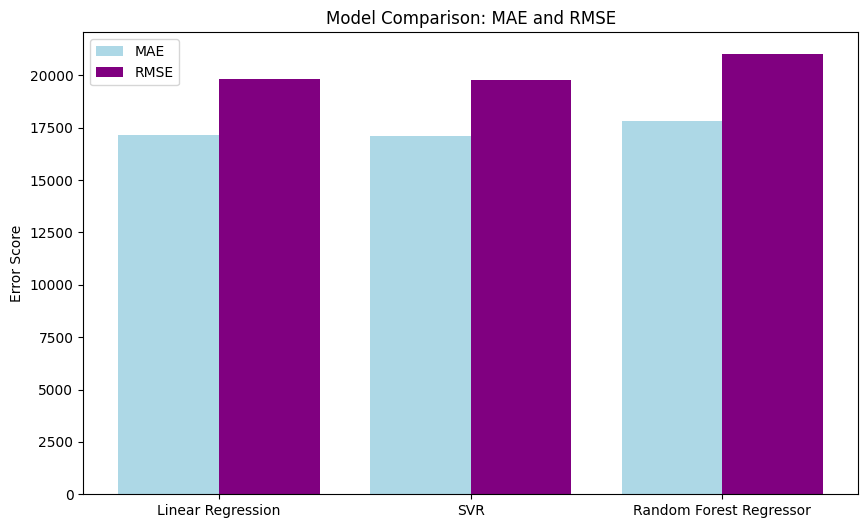

In [65]:
mae_lr = mean_absolute_error(y_test, predictionlr)
rmse_lr = np.sqrt(mean_squared_error(y_test, predictionlr))

mae_svr = mean_absolute_error(y_test, predictionssvr)
rmse_svr = np.sqrt(mean_squared_error(y_test, predictionssvr))

mae_rfr = mean_absolute_error(y_test, predictonofrfr)
rmse_rfr = np.sqrt(mean_squared_error(y_test, predictonofrfr))

mae_scores = [mae_lr, mae_svr, mae_rfr]
rmse_scores = [rmse_lr, rmse_svr, rmse_rfr]
models = ['Linear Regression', 'SVR', 'Random Forest Regressor']

x_pos = np.arange(len(models))

plt.figure(figsize=(10, 6))
plt.bar(x_pos - 0.2, mae_scores, 0.4, label='MAE', color='lightblue')
plt.bar(x_pos + 0.2, rmse_scores, 0.4, label='RMSE', color='purple')

plt.xticks(x_pos, models)
plt.ylabel('Error Score')
plt.title('Model Comparison: MAE and RMSE')
plt.legend()
plt.show()

In [67]:
import joblib
joblib.dump(gridrfr, 'rfr_model.pkl')

['rfr_model.pkl']

In [68]:
x.columns

Index(['Years_at_Company', 'Satisfaction_Level', 'Average_Monthly_Hours'], dtype='object')